In [2]:
%load_ext rpy2.ipython

# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 
* find a link in web
* cd folder
* wget link

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [6]:
%%R

library(tidyverse)

In [7]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv('2018_padro_nacionalitat_per_sexe.csv')
glimpse(barris)

Observations: 7,446
Variables: 8
$ Any            <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, …
$ Codi_Districte <dbl> 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, …
$ Nom_Districte  <chr> "Ciutat Vella", "Ciutat Vella", "Ciutat Vella", "Ciuta…
$ Codi_Barri     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Nom_Barri      <chr> "el Raval", "el Barri Gòtic", "la Barceloneta", "Sant …
$ Sexe           <chr> "Home", "Home", "Home", "Home", "Home", "Home", "Home"…
$ Nacionalitat   <chr> "Espanya", "Espanya", "Espanya", "Espanya", "Espanya",…
$ Nombre         <dbl> 11732, 4214, 4607, 6235, 11532, 18692, 15761, 15241, 2…


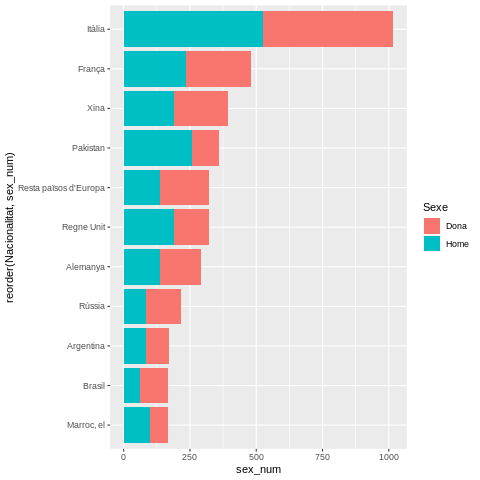

In [72]:
%%R

# Let's manually convert a few columns into factors. 
barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL))

# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#
# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

data_for_plot <- barris %>%
                    filter(Nom_Barri=='el Poblenou', Nacionalitat!='Espanya') %>%
                    group_by(Nacionalitat) %>%
                    mutate(total_num = sum(Nombre)) %>%
                    ungroup() %>%
                    group_by(Nacionalitat, Sexe) %>%
                    mutate(sex_num = sum(Nombre)) %>%
                    filter(total_num > 150)

ggplot(data_for_plot, aes(x = reorder(Nacionalitat, sex_num), y = sex_num, fill=Sexe)) +
    geom_col() +
    coord_flip()

# Problem 3: Classes in Python

In [65]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!

class RandomClassifier():
    def __init__(self, probability):
        self.probability = probability
        self.x = None
    
    def predict(self, x):
        self.x = x
        return np.random.binomial(1, self.probability)

In [66]:
import numpy as np

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)

# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

[Pure function - Wikipedia](https://en.wikipedia.org/wiki/Pure_function)


In computer programming, a pure function is a function that has the following properties:

* Its return value is the same for the same arguments (no variation with local static variables, non-local variables, mutable reference arguments or input streams from I/O devices).
* Its evaluation has no side effects (no mutation of local static variables, non-local variables, mutable reference arguments or I/O streams).

<br>

[Benefits of pure functions](https://alvinalexander.com/scala/fp-book/benefits-of-pure-functions)
* They’re easier to reason about
* They’re easier to combine
* They’re easier to test
* They’re easier to debug
* They’re easier to parallelize
* They are idempotent
* They offer referential transparency
* They are memoizable
* They can be lazy

### What is lazy evaluation and when might you use it? (2-3 lines)

[Lazy evaluation - Wikipedia](https://en.wikipedia.org/wiki/Lazy_evaluation)

In programming language theory, lazy evaluation, or call-by-need is an evaluation strategy which delays the evaluation of an expression until its value is needed (non-strict evaluation) and which also avoids repeated evaluations (sharing). The sharing can reduce the running time of certain functions by an exponential factor over other non-strict evaluation strategies, such as call-by-name.

However, for lengthy operations, it would be more appropriate to perform before any time-sensitive operations, such as handling user inputs in a video game.

The **benefits** of lazy evaluation include:

* The ability to define control flow (structures) as abstractions instead of primitives.
* The ability to define potentially infinite data structures. This allows for more straightforward implementation of some algorithms.
* Performance increases by avoiding needless calculations, and avoiding error conditions when evaluating compound expressions.


**Applications** of lazy evaluation include:
* Control structures
* Working with infinite data structures
* List-of-successes pattern
* Avoiding excessive effort
* Avoidance of error conditions
* Other uses